In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.preprocessing import LabelEncoder
import scipy.cluster.hierarchy as sch

In [2]:
df = pd.read_csv('cities_r2.csv')

In [3]:
df

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,Vizianagaram,28,ANDHRA PRADESH,12,227533,111596,115937,20487,10495,9992,...,80306,1039,952,81.85,88.18,75.80,"18.1066576,83.3955506",30656,19173,11483
489,Warangal,28,ANDHRA PRADESH,9,620116,310400,309716,55392,28434,26958,...,217136,998,948,84.16,91.54,76.79,"17.9689008,79.5940544",109613,69507,40106
490,Wardha,27,MAHARASHTRA,8,105543,53241,52302,9754,5139,4615,...,43339,982,898,94.05,97.19,90.88,"20.745319,78.6021946",19363,10645,8718
491,Yamunanagar,6,HARYANA,3,216628,115404,101224,22905,12556,10349,...,74255,877,824,85.91,89.61,81.71,"30.1290485,77.2673901",29803,14349,15454


In [4]:
ls = []
for k in range(1, 10):
    model = KMeans(n_clusters=k, max_iter=50)
    model.fit(df[['effective_literacy_rate_total']])
    ls.append(model.inertia_)

In [5]:
df[['name_of_city', 'state_name', 'location']] = df[['name_of_city', 'state_name', 'location']].apply(LabelEncoder().fit_transform)

In [6]:
df

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,0,3,22,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,455,16287,8612,7675
1,1,27,14,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,154,8863,5269,3594
2,2,28,1,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,116,10565,6797,3768
3,3,20,10,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,215,19225,12189,7036
4,4,28,1,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,66,11902,7871,4031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,487,28,1,12,227533,111596,115937,20487,10495,9992,...,80306,1039,952,81.85,88.18,75.80,100,30656,19173,11483
489,488,28,1,9,620116,310400,309716,55392,28434,26958,...,217136,998,948,84.16,91.54,76.79,99,109613,69507,40106
490,489,27,14,8,105543,53241,52302,9754,5139,4615,...,43339,982,898,94.05,97.19,90.88,140,19363,10645,8718
491,490,6,7,3,216628,115404,101224,22905,12556,10349,...,74255,877,824,85.91,89.61,81.71,454,29803,14349,15454


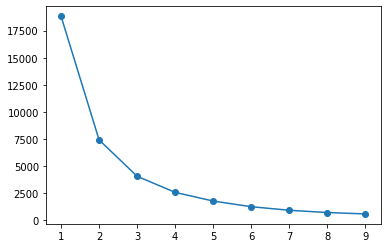

In [7]:
plt.plot(range(1, 10), ls, 'o-')
plt.show()

In [8]:
model = KMeans(n_clusters=3, max_iter=100)
model.fit(df[['effective_literacy_rate_total']])

KMeans(max_iter=100, n_clusters=3)

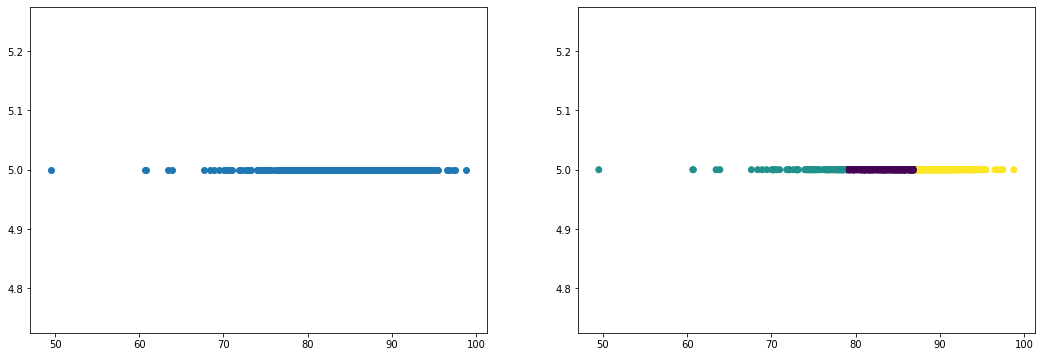

In [9]:
fig, axis = plt.subplots(1, 2, figsize=(9*2, 6*1))
axis[0].scatter(df[['effective_literacy_rate_total']], np.zeros(df.shape[0]) +5)
axis[1].scatter(df[['effective_literacy_rate_total']], np.zeros(df.shape[0]) +5, c=model.labels_)
plt.show()

In [10]:
df_norm = pd.DataFrame(normalize(df), columns=df.columns)

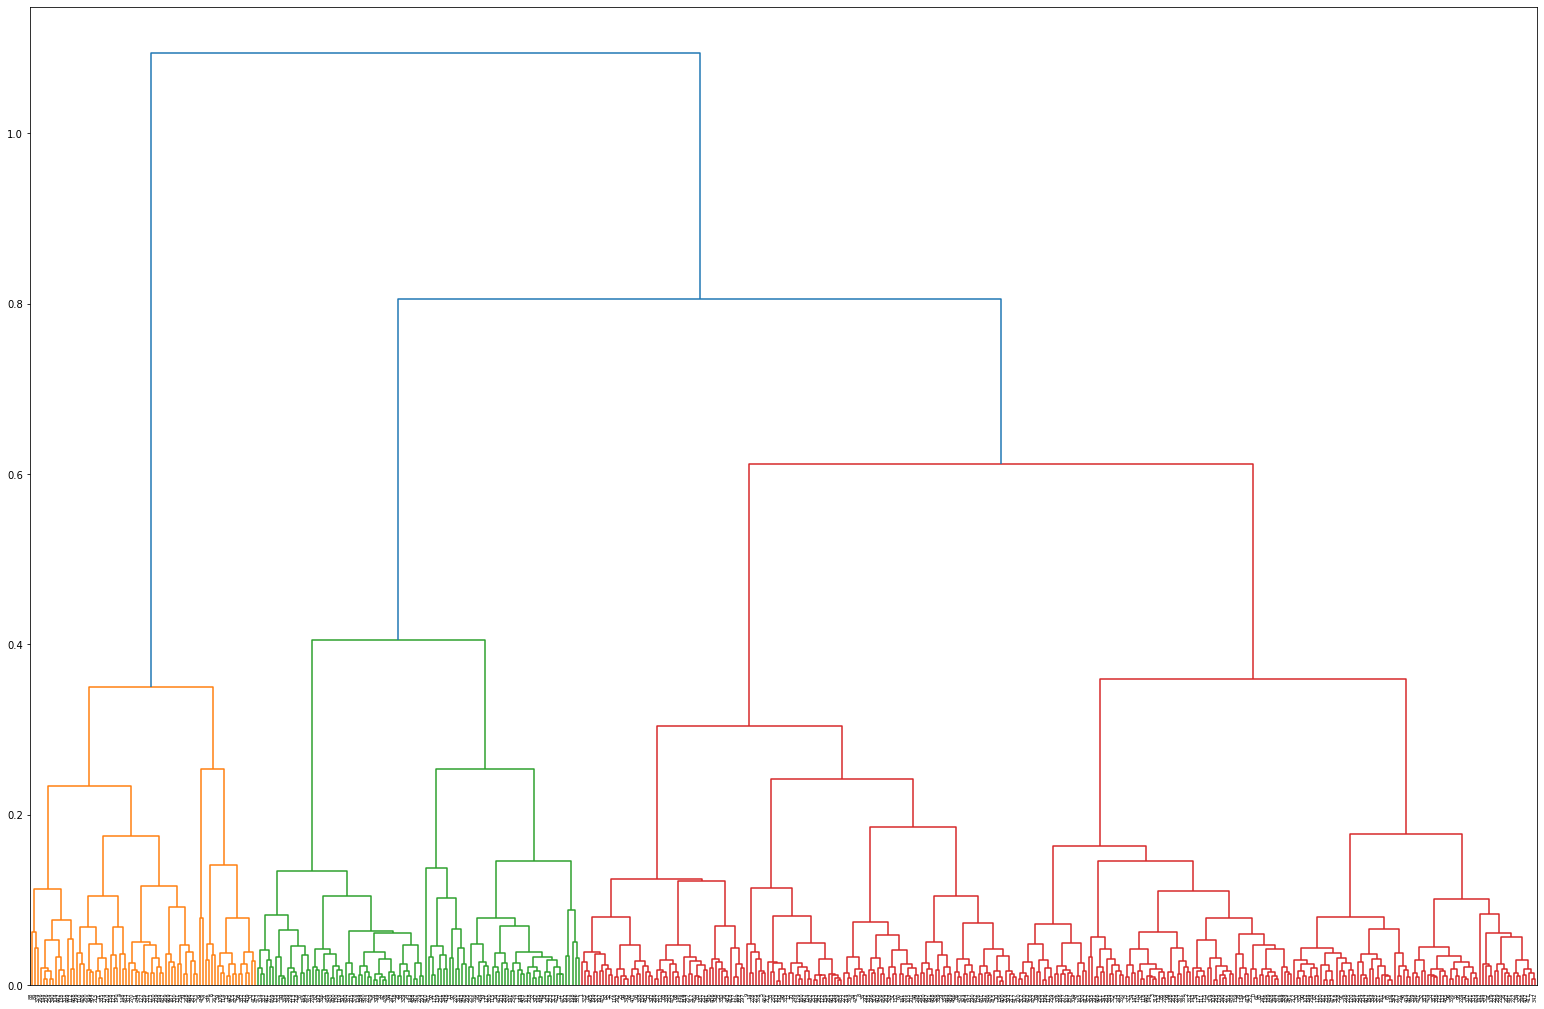

In [11]:
plt.figure(figsize=(9*3, 6*3))
sch.dendrogram(sch.linkage(df_norm, method='ward'))
plt.show()

In [12]:
model = AgglomerativeClustering(n_clusters=3)
model.fit_predict(df_norm)

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 1, 2, 2, 2, 2, 0, 2,
       2, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 2, 1,
       0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 2, 0, 2, 1, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 1, 1, 1, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1,

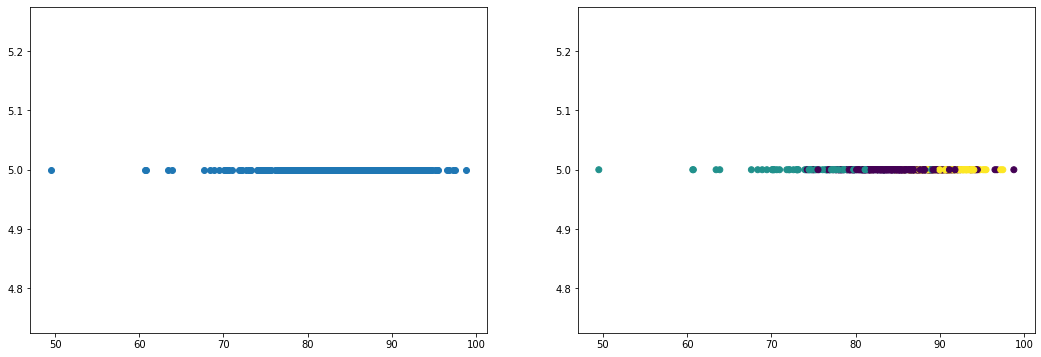

In [13]:
fig, axis = plt.subplots(1, 2, figsize=(9*2, 6*1))
axis[0].scatter(df[['effective_literacy_rate_total']], np.zeros(df.shape[0]) +5)
axis[1].scatter(df[['effective_literacy_rate_total']], np.zeros(df.shape[0]) +5, c=model.labels_)
plt.show()